# Getting the Data

In [1]:
import wrangle
import features
 
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = wrangle.get_training_data()

---Acquiring the Data---
rows: 91713, columns: 186
Selecting specfic columns to use
rows: 91713, columns: 18


---Handling Missing Values---
Filling nulls with mode for the following features:
	 * age
	 * bmi
	 * ethnicity
Handling nulls within rows
	 * Dropping patients with no recorded gender
		 - Number of patients dropped: 25
Filling nulls with 0 (aka False) for the following columns
	 * arf_apache
	 * intubated_apache
	 * cirrhosis
	 * aids
	 * diabetes_mellitus
	 * hepatic_failure
	 * immunosuppression
	 * leukemia
	 * lymphoma
	 * solid_tumor_with_metastasis
	 * hospital_death
	 * ethnicity
	 * gender
	 * age
	 * bmi
Filling nulls in the gcs data with the average (5)


---Converting Data Types---
done


In [3]:
df = features.add_gcs(df)

In [4]:
df.head()

,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,hospital_death,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,gcs
patient_id,,,,,,,,,,,,,,,,,,,
25312,22.73,68,M,Caucasian,False,False,False,False,False,True,False,False,False,False,False,3,6,4,13
59342,27.42,77,F,Caucasian,False,False,False,False,False,True,False,False,False,False,False,1,3,1,5
50777,31.95,25,F,Caucasian,False,False,False,False,False,False,False,False,False,False,False,3,6,5,14
46918,22.64,81,F,Caucasian,False,False,False,False,False,False,False,False,True,False,False,4,6,5,15
34377,14.00,19,M,Caucasian,False,False,False,False,False,False,False,False,False,False,False,5,5,5,15


In [5]:
df.dtypes

bmi                            float64
age                              int64
gender                          object
ethnicity                       object
solid_tumor_with_metastasis       bool
lymphoma                          bool
leukemia                          bool
immunosuppression                 bool
hepatic_failure                   bool
diabetes_mellitus                 bool
aids                              bool
cirrhosis                         bool
intubated_apache                  bool
hospital_death                    bool
arf_apache                        bool
gcs_eyes_apache                  int64
gcs_motor_apache                 int64
gcs_verbal_apache                int64
gcs                              int64
dtype: object

In [6]:
df.head()

,bmi,age,gender,ethnicity,solid_tumor_with_metastasis,lymphoma,leukemia,immunosuppression,hepatic_failure,diabetes_mellitus,aids,cirrhosis,intubated_apache,hospital_death,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,gcs
patient_id,,,,,,,,,,,,,,,,,,,
25312,22.73,68,M,Caucasian,False,False,False,False,False,True,False,False,False,False,False,3,6,4,13
59342,27.42,77,F,Caucasian,False,False,False,False,False,True,False,False,False,False,False,1,3,1,5
50777,31.95,25,F,Caucasian,False,False,False,False,False,False,False,False,False,False,False,3,6,5,14
46918,22.64,81,F,Caucasian,False,False,False,False,False,False,False,False,True,False,False,4,6,5,15
34377,14.00,19,M,Caucasian,False,False,False,False,False,False,False,False,False,False,False,5,5,5,15


### Examining Age

Text(0, 0.5, '# of Patients')

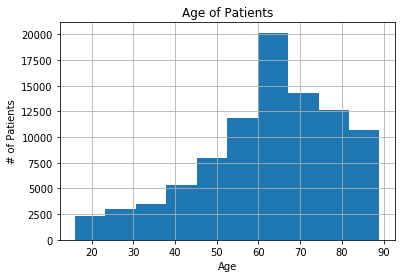

In [7]:
df.age.hist()
plt.title('Age of Patients')
plt.xlabel('Age')
plt.ylabel('# of Patients')

In [8]:
num_of_seniors = len(df[df.age > 59])
print('Percentage of ICU patients aged 60 or older:{: .2f}'.format(num_of_seniors / len(df)))

Percentage of ICU patients aged 60 or older: 0.63


In [9]:
no_age = df.age.isna().sum()
print(f'Number of patients without recorded ages: {no_age}')
print('Percentage of patients without recorded ages:{: .2f}'.format(no_age/ len(df)))

Number of patients without recorded ages: 0
Percentage of patients without recorded ages: 0.00


Solution for Age: Fill with Mode

# Explore

## Broad Strokes of All the Data

In [10]:
total_dead = df.hospital_death.sum()

In [11]:
print("{:.2%}".format(total_dead/len(df)))

8.62%
